In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from matplotlib import cm

In [2]:
# get the colormap and extract 10 colors
viridis = cm.get_cmap('viridis', 30)

In [3]:
#read csv
file = "Resources/project_one_data.csv"
data = pd.read_csv(file)
data = data[data['Age'] > 15]
data

,Unnamed: 0,Serial Number,State,Transportation,Wages,Education,Parent Origin,Age,Internet,Region,Laptop,# of Vehicles
0,0,84,1,NaN,0.0,19.0,0.0,19,NaN,3,NaN,NaN
1,1,154,1,1.0,52000.0,20.0,0.0,55,1.0,3,1.0,3.0
2,2,154,1,11.0,0.0,16.0,0.0,56,1.0,3,1.0,3.0
3,3,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
4,4,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2582037,3132789,1490418,56,NaN,0.0,16.0,0.0,86,3.0,4,2.0,0.0
2582038,3132790,1490639,56,1.0,50000.0,20.0,0.0,59,1.0,4,1.0,1.0
2582039,3132791,1490649,56,NaN,6600.0,20.0,0.0,58,NaN,4,NaN,NaN
2582040,3132792,1491926,56,1.0,600.0,21.0,0.0,29,1.0,4,1.0,2.0


In [4]:
#determine transportation variable names
data["Transportation"].value_counts()

1.0     1188024
11.0      64891
10.0      41287
2.0       31486
4.0       22488
12.0      11600
9.0        8236
5.0        8206
8.0        3123
7.0        1273
3.0         672
6.0         577
Name: Transportation, dtype: int64

In [5]:
#rename transportation values
transport_df = data
transport_df["Transportation"] = transport_df["Transportation"].replace(
    {1.0: "Personal Vehicle", 
     2.0: "Public Transportation", 
     3.0: "Public Transportation",
     4.0: "Public Transportation",
     5.0: "Railroad",
     6.0: "Ferry",
     7.0: "Taxi",
     8.0: "Motorcycle",
     9.0: "Bicycle",
     10.0: "Walk",
     11.0: "Work From Home",
     12.0: "Other"
    })
transport_df

,Unnamed: 0,Serial Number,State,Transportation,Wages,Education,Parent Origin,Age,Internet,Region,Laptop,# of Vehicles
0,0,84,1,NaN,0.0,19.0,0.0,19,NaN,3,NaN,NaN
1,1,154,1,Personal Vehicle,52000.0,20.0,0.0,55,1.0,3,1.0,3.0
2,2,154,1,Work From Home,0.0,16.0,0.0,56,1.0,3,1.0,3.0
3,3,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
4,4,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2582037,3132789,1490418,56,NaN,0.0,16.0,0.0,86,3.0,4,2.0,0.0
2582038,3132790,1490639,56,Personal Vehicle,50000.0,20.0,0.0,59,1.0,4,1.0,1.0
2582039,3132791,1490649,56,NaN,6600.0,20.0,0.0,58,NaN,4,NaN,NaN
2582040,3132792,1491926,56,Personal Vehicle,600.0,21.0,0.0,29,1.0,4,1.0,2.0


In [6]:
#groupby transport
transport = transport_df.groupby("Transportation")
trn_average_wage = transport['Wages'].mean()
trn_max_wage = transport['Wages'].max()
trn_min_wage = transport['Wages'].min()


transport_grouped_df = pd.DataFrame({
    "Average Wages": trn_average_wage,
    "Max Wages" : trn_max_wage,
    "Min Wages": trn_min_wage
})
transport_grouped_df


,Average Wages,Max Wages,Min Wages
Transportation,,,
Bicycle,41623.612190,560000.0,0.0
Ferry,97210.710572,560000.0,0.0
Motorcycle,51913.134806,560000.0,0.0
Other,42520.020000,655000.0,0.0
Personal Vehicle,45990.041147,660000.0,0.0
Public Transportation,45870.476961,660000.0,0.0
Railroad,106666.118694,655000.0,0.0
Taxi,58141.264729,560000.0,0.0
Walk,28213.180614,660000.0,0.0


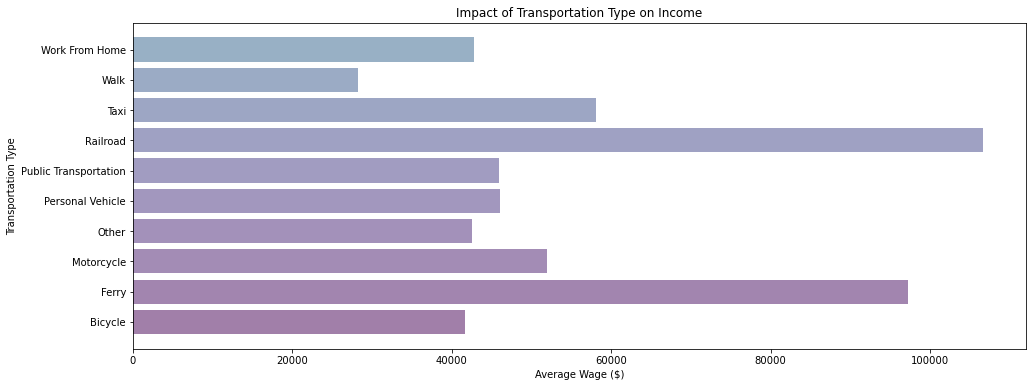

In [8]:
# define figure and create bar chart for transportation
fig, ax = plt.subplots(1, figsize=(16, 6))
colors =[viridis.colors[0],viridis.colors[1],viridis.colors[2],viridis.colors[3],
         viridis.colors[4],viridis.colors[5],viridis.colors[6],viridis.colors[7],
         viridis.colors[8],viridis.colors[9]]
plt.barh(transport_grouped_df.index, trn_average_wage, color = colors, alpha = .5)

labels = transport_grouped_df.index
plt.xticks(label = labels)
plt.title('Impact of Transportation Type on Income')
plt.xlabel('Average Wage ($)')
plt.ylabel('Transportation Type')
plt.savefig("Images/transportation_bar.png")
plt.show()

In [9]:
#internet groupby
internet = data.groupby("Internet")
int_average_wage = internet["Wages"].mean()
int_max_wage = internet["Wages"].max()
int_min_wage = internet["Wages"].min()


In [10]:
#create internet dataframe
internet_df = pd.DataFrame({
    "Average Wages": int_average_wage,
    "Max Wages" : int_max_wage,
    "Min Wages": int_min_wage
})
internet_df

,Average Wages,Max Wages,Min Wages
Internet,,,
1.0,31355.514345,660000.0,0.0
2.0,20622.046110,655000.0,0.0
3.0,10671.316096,560000.0,0.0


Text(0.5, 1.0, 'Breakdown of Individuals with Internet Access and Type')

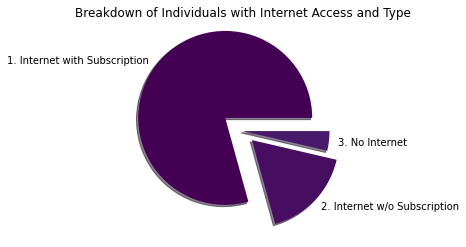

In [11]:
#create internet access pie chart
internet_counts= data["Internet"].value_counts()
colors = [viridis.colors[0],viridis.colors[1],viridis.colors[2]]
labels = [f'1. Internet with Subscription', f'2. Internet w/o Subscription', f'3. No Internet']
explode = [.25,.15,0]
plt.pie(
    internet_counts,
    explode=explode,
    labels=labels,
    shadow=True,
    colors = colors)
plt.title("Breakdown of Individuals with Internet Access and Type")


Text(0, 0.5, 'Average Wage')

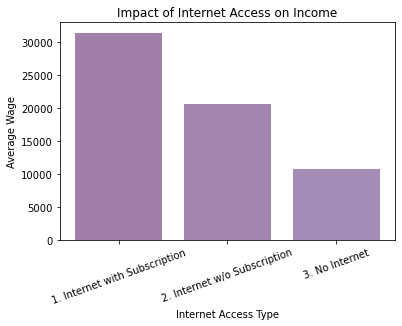

In [12]:
#create average wage by internet bar chart
colors = [viridis.colors[0],viridis.colors[1],viridis.colors[2]]
plt.bar(internet_df.index, int_average_wage, color = colors, alpha = .5)
plt.xticks(ticks = internet_df.index, labels=labels, rotation = 20)
plt.title('Impact of Internet Access on Income')
plt.xlabel('Internet Access Type')
plt.ylabel('Average Wage')


In [13]:
#vehicle grouping
vehicle = data.groupby("# of Vehicles")
veh_average_wage  = vehicle["Wages"].mean()
veh_max_wage = vehicle["Wages"].max()
veh_min_wage = vehicle["Wages"].min()
vehicle_df = pd.DataFrame({
    "Average Wages": veh_average_wage,
    "Max Wages" : veh_max_wage,
    "Min Wages": veh_min_wage
})
vehicle_df


,Average Wages,Max Wages,Min Wages
# of Vehicles,,,
0.0,13404.029125,560000.0,0.0
1.0,20084.976598,660000.0,0.0
2.0,31213.893877,660000.0,0.0
3.0,32116.790803,660000.0,0.0
4.0,30061.613234,660000.0,0.0
5.0,28934.944608,655000.0,0.0
6.0,27262.752653,655000.0,0.0


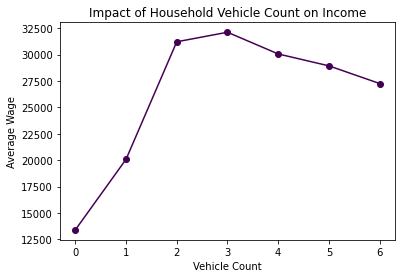

In [14]:
#vehicle line chart by average wage
plt.plot(vehicle_df.index, vehicle_df['Average Wages'], label ='Average Wages', color = viridis.colors[0], marker="o")
plt.title('Impact of Household Vehicle Count on Income')
plt.xlabel('Vehicle Count')
plt.ylabel('Average Wage')
plt.show()

Text(0, 0.5, 'Average Wage')

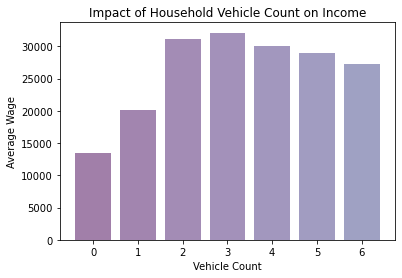

In [15]:
#vehicle bar chart by average wage
colors = [viridis.colors[0],viridis.colors[1],viridis.colors[2],viridis.colors[3],viridis.colors[4],viridis.colors[5],viridis.colors[6]]
plt.bar(vehicle_df.index, veh_average_wage, color = colors, alpha = .5)
plt.title('Impact of Household Vehicle Count on Income')
plt.xlabel('Vehicle Count')
plt.ylabel('Average Wage')

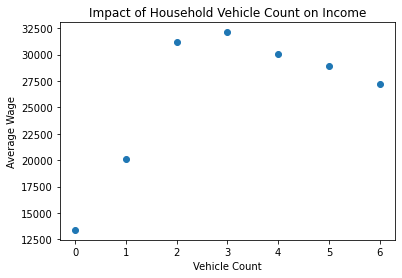

In [16]:
#vehicle scatter chart by average wage
plt.scatter(vehicle_df.index, veh_average_wage)
plt.title('Impact of Household Vehicle Count on Income')
plt.xlabel('Vehicle Count')
plt.ylabel('Average Wage')
plt.show()

In [17]:
#laptop grouping
laptop = data.groupby("Laptop")
lap_average_wage = laptop["Wages"].mean()
lap_max_wage = laptop["Wages"].max()
lap_min_wage = laptop["Wages"].min()
laptop_df = pd.DataFrame({
    "Average Wages": lap_average_wage,
    "Max Wages" : lap_max_wage,
    "Min Wages": lap_min_wage
})
laptop_df


,Average Wages,Max Wages,Min Wages
Laptop,,,
1.0,30732.132076,660000.0,0.0
2.0,10891.436634,655000.0,0.0


In [18]:
laptop_list = laptop_df["Average Wages"].tolist()
internet_list = internet_df["Average Wages"].tolist()
vehicle_list = vehicle_df["Average Wages"].tolist()

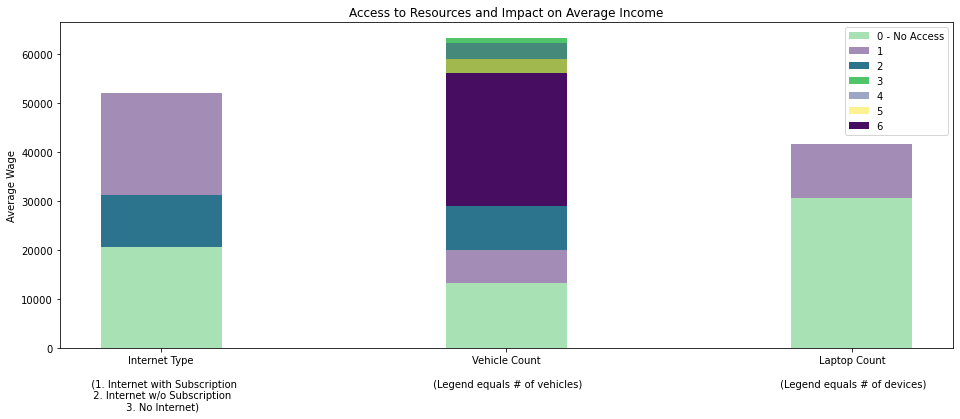

In [20]:
#stacked bar for each access type using https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7
#bar 1 is internet
#bar 2 is vehicles
#bar 3 is laptop

# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))

group1 =[internet_list[0], 
         vehicle_list[0],
         laptop_list[0]]
group2 = [internet_list[1], 
          vehicle_list[1],
          laptop_list[1]]
group3 = [internet_list[2], 
          vehicle_list[2],
          0]
group4 = [0, 
          vehicle_list[3],
          0]
group5 = [0,
         vehicle_list[4],
          0]            
group6 = [0,
         vehicle_list[5],
          0]
group7 = [0,
         vehicle_list[6],
          0]
N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars

p1 = plt.bar(ind, group1, width, color =viridis.colors[21], alpha = .5)
p2 = plt.bar(ind, group2, width, bottom=group1, color =viridis.colors[2], alpha = .5)
p3 = plt.bar(ind, group3, width,bottom=group2, color =viridis.colors[11])
p4 = plt.bar(ind, group4, width,bottom=group3, color =viridis.colors[21] )
p5 = plt.bar(ind, group5, width, bottom=group4, color =viridis.colors[7], alpha = .5)
p6 = plt.bar(ind, group6, width,bottom=group5, color =viridis.colors[29], alpha = .5)
p7 = plt.bar(ind, group7, width,bottom=group6, color =viridis.colors[1])
plt.ylabel('Average Wage')
plt.title('Access to Resources and Impact on Average Income')
plt.xticks(ind, 
           (f'Internet Type\n\n  (1. Internet with Subscription\n 2. Internet w/o Subscription\n 3. No Internet)', 
            'Vehicle Count\n\n (Legend equals # of vehicles)', 
            'Laptop Count\n\n (Legend equals # of devices)'))

plt.legend((p1[0], p2[0], p3[0],p4[0], p5[0], p6[0], p7[0]), ('0 - No Access', '1', "2", "3", "4","5","6"))
plt.savefig("Images/access_stackedbar.png")
plt.show()